Das Ziel dieser Aufgabe ist es, den **Decision Tree** auf verschiedene Weise zu erweitern: (1) durch *Bagging*, in Form eines **Random Forest** und (2) durch *Boosting*. Wir benutzen zur Implementierung des **Decision Trees** die in Scikit-Learn verfügbare Implementierung und erweitern diese für die gewünschte Implementierung der zwei Algorithmen.

## (2.4.1) Decision Trees <span style="color:green; font-size:1em">(o)</span> <span style="font-size:1em">&#x1F4D7;</span>

**<span style="color:green; font-size:2em">(a)</span>** <span style="font-size:2em">&#x1F4D7;</span> Laden Sie den in Scikit-Learn verfügbaren Iris-Datensatz und behalten Sie von den vier Features des Datensatzes nur die ersten zwei, damit das Problem einfach zu visualisieren ist. Plotten Sie den Datensatz mit `plt.scatter` und weisen Sie den Klassen verschiedene Farben zu.

**<span style="color:green; font-size:2em">(b)</span>** <span style="font-size:2em">&#x1F4D7;</span> In der begleitenden Python-File `utils_viz.py` befindet sich eine Funktion `visualize_classifier`, denen als Argumente ein Scikit-Learn-Modell sowie die Trainings-Beobachtungen und Trainings-Labels übergeben werden können. Machen Sie sich mit der Funktion vertraut.

**<span style="color:green; font-size:2em">(c)</span>** <span style="font-size:2em">&#x1F4D7;</span> Trainieren Sie einen einfachen **Decision Tree** mit default-Parametern bis auf das Argument `max_depth`. Varieren Sie dieses Argument und benutzen Sie die Funktion aus **b)** um die Entscheidungsgrenzen Bäume verschiedener Tiefe zu visualisieren. Trainieren Sie auf der gesamten Datenmenge.

**<span style="color:green; font-size:2em">(d)</span>** <span style="font-size:2em">&#x1F4D7;</span> Teilen Sie nun die Daten in Trainings- und Testdaten auf. Weisen Sie zufällig 50% der Daten dem Trainingsdatensatz zu und die verbliebenen Daten dem Testdatensatz (Tipp: benutzen Sie am besten die Funktion `train_test_split`, die unten beispielhaft erklärt wird). Trainieren Sie nun für jede Tiefe von $1-5$ einen **Decision Tree** und evaluieren Sie mit den Testdaten. Plotten Sie die Korrekte-Klassifikationsrate/Genauigkeit gegen die Tiefe des Modells.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import seaborn as sns; sns.set()

### a)

In [2]:
# Datensatz - Dokumentation
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# X soll eine Matrix sein mit [n_samples, n_features]
# y soll ein Vektor sein mit [n_samples]
# n_samples = 150
# n_features = 4

# Die X Matrix
X = iris.data

# Behalte nur die ersten zwei Features (Spalten)
X = X[:, [0, 1]]
# Alternative
X = X[:, :2]

# Die Zielvariablen - y
y = iris.target

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

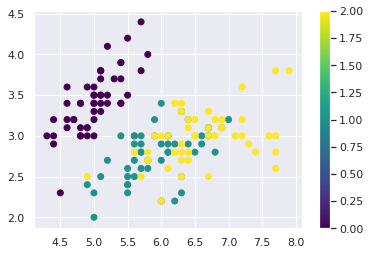

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis");
plt.colorbar()

### b)

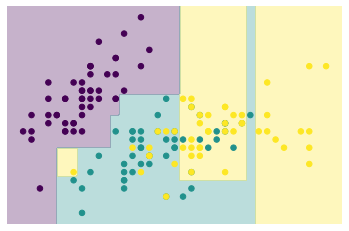

In [6]:
import utils_viz
model = DecisionTreeClassifier(max_depth=5)
utils_viz.visualize_classifier(model, X, y, cmap="viridis")

### c)

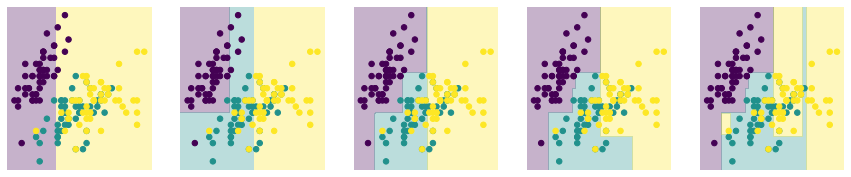

In [7]:
models = []
for depth in [1, 2, 3, 4, 5]:
    model = DecisionTreeClassifier(max_depth=depth)
    models.append(model)
    
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(len(models)):
    ax = axes[i]
    model = models[i]
    utils_viz.visualize_classifier(model, X, y, ax=ax, cmap="viridis")

### d)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.5)

In [12]:
# Trainiere einen DecisionTree für verschiedene Tiefen und beobachte
# Overfitting/Underfitting
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

train_accuracies = []
test_accuracies= []
models = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    models.append(model)
    
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_accuracy = np.sum(y_pred_train == y_train) / len(y_train)
    test_accuracy = np.sum(y_pred_test == y_test) / len(y_test)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

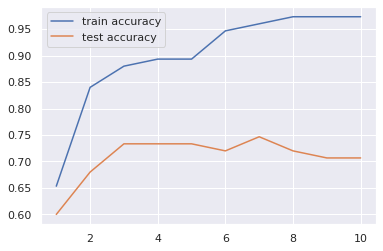

In [13]:
plt.plot(depths, train_accuracies, label="train accuracy")
plt.plot(depths, test_accuracies, label="test accuracy")
plt.legend()

## (2.4.2) Bagging - Random Forests - Classification <span style="color:orange; font-size:1em">(oo) </span> <span style="font-size:1em">&#x1F4D9;</span>

Unser nächstes Ziel ist es, die Entscheidungsgrenze eines **Random Forest** mit dem eines **Decision Trees** zu vergleichen. Wir betrachten einen **Random Forest**, der aus 100 Bäumen zusammengesetzt ist. Jeder dieser Bäume soll auf nur auf einem Teil der Trainingsdaten trainiert werden. Wählen Sie für jeden Baum zufällig 50% der Trainingsdaten aus (Tipp: benutzen Sie zum Beispiel `np.random.permutation` oder `np.random.choice` oder `train_test_split`). Die Vorhersage-Funktion soll ein einfacher *Majority-Vote* der einzelnen Bäume sein (die Vorhersage ist die Klasse, die von den meisten Bäumen vorhergesagt wird).

**<span style="color:green; font-size:2em">(a) </span>** <span style="font-size:2em">&#x1F4D7;</span> Implementieren Sie die unten aufgeführte Funktion `fit`, die als Input einen Random Forest erhält und den Fit der einzelnen Bäume ausführt.

**<span style="color:orange; font-size:2em">(b) </span>** <span style="font-size:2em">&#x1F4D7;</span> Implementieren Sie die unten aufgeführte Funktion `predict`, die als Input einen Random Forest erhält und die Vorhersagen der einzelnen Bäume ermittelt und daraufhin einen *Majority-Vote* ausführt (Tipp: `scipy.stats.mode`).

**<span style="color:red; font-size:2em">(c) </span>** <span style="font-size:2em">&#x1F4D9;</span> In dieser Aufgabe soll der Random Forest objekt-orientiert implementiert werden. Implementieren Sie dazu die entsprechenden Funktionen der unten bereits vorimplementierten Klasse, sodass ihr **Random Forest** Klassifikator mit `visualize_classifier` aus `utils_viz.py` benutzt werden kann (Tipp: `scipy.stats.mode`).

**<span style="color:green; font-size:2em">(d) </span>** <span style="font-size:2em">&#x1F4D7;</span> Teilen Sie die Daten wie zuvor in Trainings- und Testdaten auf. Trainieren Sie das Modell und visualisieren Sie die Entscheidungsgrenze. Berechnen Sie die Test-Klassifikationsrate und vergleichen Sie mit den **Decision Trees** aus der vorherigen Aufgabe.

## (2.4.3) Bagging - Random Forests - Regression <span style="color:orange; font-size:1em">(oo) </span> <span style="font-size:1em">&#x1F4D9;</span>

In dieser Aufgabe soll wie bei der Klassifikation ein einfacher **Random Forest** Klassifikator erstellt werden, der auf der Basis-Klasse `DecisionTreeRegressor` beruht. Anstatt eines *Majority-Votes* ist hier der Vorhersage-Mechanismus ein einfaches *Averaging* der Vorhersagen der einzelnen Bäume. Jeder einzelne Baum soll wie zuvor auf 50% der Trainingsdaten trainiert werden.

**<span style="color:green; font-size:2em">(a) </span>** <span style="font-size:2em">&#x1F4D9;</span> Implementieren Sie eine Funktion `fit`, die als Input einen Random Forest erhält und den Fit der einzelnen Bäume ausführt. Orientieren Sie sich an Aufgabe **2a)**.

**<span style="color:orange; font-size:2em">(b) </span>** <span style="font-size:2em">&#x1F4D9;</span> Implementieren Sie eine Funktion `predict`, die als Input einen Random Forest erhält und die Vorhersagen der einzelnen Bäume ermittelt und daraufhin ein *Averaging* ausführt. Orientieren Sie sich an Aufgabe **2b)**.

**<span style="color:red; font-size:2em">(c) </span>** <span style="font-size:2em">&#x1F4D9;</span> In dieser Aufgabe soll der Random Forest Regressor objekt-orientiert implementiert werden. Implementieren Sie dazu die entsprechenden Funktionen der unten bereits vorimplementierten Klasse.

**<span style="color:orange; font-size:2em">(d) </span>** <span style="font-size:2em">&#x1F4D9;</span> Die Funktion `utils_tree.benchmark` gibt die durchschnittliche Performance des Klassifikators für 100 zufällige Train/Test-Splits aus. Benutzen Sie diese Funktion, um für zwei Beispiel-Datensätze (`load_boston` und `load_diabetes` aus Scikit-Learn) und für eine variable Menge an Bäumen, das heißt für `nb_trees = [1,2,4,8,16,32]`, die Performance zu berechnen. Die Performance wird statt wie üblich als quadratischer Fehler als *Score* berechnet, der zwischen $-\infty$ und $1$ liegt und die Qualität der Regression beschreibt. Ein Score von $1$ steht dabei für eine perfekte Regression, während ein Score von $0$ äquivalent zu einem konstanten Modell ist. Ein negativer Score steht für einen Regressor, der systematisch falsch liegt. Plotten Sie die Ergebnisse. Vergleichen Sie mit dem Ergebnis für einen einfachen Baum.

## (2.4.4) Boosting - Regression <span style="color:red; font-size:1em">(ooo) </span> <span style="font-size:1em">&#x1F4D8;</span>

In dieser Aufgabe implementieren Sie einen einfachen Boosting-Algorithmus. Wie bei einem Bagging-Algorithmus beruht auch ein Boosting-Algorithmus auf der Vorhersage eines Ensembles verschiedener *weak learners*, in diesem Fall **Decision Trees**. Im Gegensatz zum Bagging werden die Vorhersagen der einzelner Lerner aber nicht unabhängig voneinander vorgenommen und dann zusammengefasst, sondern die Aufgabe jedes Lerners ist es, die Vorhersage aller vorherigen Lerner zu verbessern.

Die hier betrachtete Variante des Boostings soll folgendermaßen funktionieren. Sei 

$$
F_k(x^{(i)}) = f_1(x) + f_2(x) + ... + f_k(x)
$$

die Vorhersage eines Boosting mit bereits $k$ trainierten Bäumen. Ein neuer Lerner wird nun einfach auf dem Residual des Fehlers dieser Vorhersage trainiert. Wir definieren für jeden Datenpunkt eine neue Zielvariable:

$$
y_{k+1}^{(i)} = r(x^{(i)}) = y_T^{(i)} - F_k(x^{(i)})
$$

und trainieren den neuen Baum nun auf dem Datensatz $\{(x^{(i)}, y_{k+1}^{(i)}) \; | \; i = 1, ..., N\}$. Die dabei gelernte Vorhersagefunktion sei $f_{k+1}(x)$

Die Vorhersagefunktion des initialen Baums sei mit $f_1(x) = \bar{y} = \sum_{i=1}^N y_T^{(i)}$ schlicht der durchschnittliche Wert der Zielvariablen der Trainingsdaten.

Sobald die gewünschten $K$ Bäume trainiert sind, ist die Vorhersagefunktion des gesamten Modells einfach die Summe der einzelnen Bäume:

$$
\hat{y}(x) = F_K(x) = f_1(x) + f_2(x) + ... + f_K(x)
$$


**<span style="color:red; font-size:2em">(a) </span>** <span style="font-size:2em">&#x1F4D8;</span> Implementieren Sie den beschriebenen Boosting-Algorithmus, indem Sie die unten vorimplementierte Klasse vervollständigen.

**<span style="color:orange; font-size:2em">(d) </span>** <span style="font-size:2em">&#x1F4D8;</span> Benchmarking: Wiederholen Sie die Experimente aus Aufgabe **3b)** für den Boosting-Regressor.

## (2.4.5) Vergleichen <span style="color:green; font-size:1em">(o) </span> <span style="font-size:1em">&#x1F4D7;</span>

Nutzen Sie untenstehenden Code, um die verschiedenen Algorithmen miteinander zu vergleichen, wenn sich jeweils die Komplexität der zu Grunde liegenden Bäume erhöht. Interpretieren Sie das Ergebnis. (Verwenden Sie, falls Sie in den vorherigen Aufgaben den `RandomForestRegressor` und den `SimpleBoostedTreeRegressor` nicht implementiert haben stattdessen die in Scikit-Learn verfügbaren Implementierungen.)